In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import roc_auc_score
import shap

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


***1.EDA***

In [3]:
df = pd.read_csv('Hotel Reservations.csv')

In [4]:
df.shape

(36275, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
df[num_cols].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [12]:
target = df['booking_status'].value_counts()
print(target)

booking_status
0    24390
1    11885
Name: count, dtype: int64


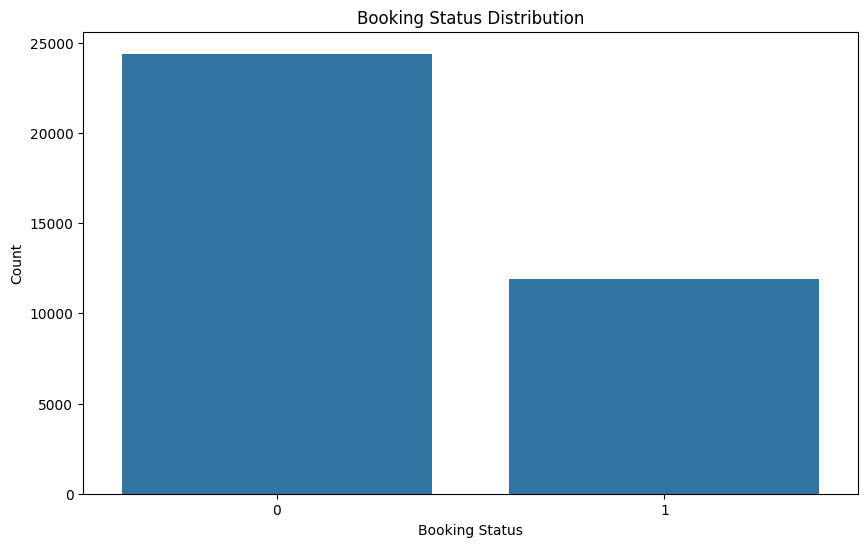

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='booking_status', data=df)
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15520\3974348179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=full_corr_with_target.values, y=full_corr_with_target.index, palette="coolwarm")


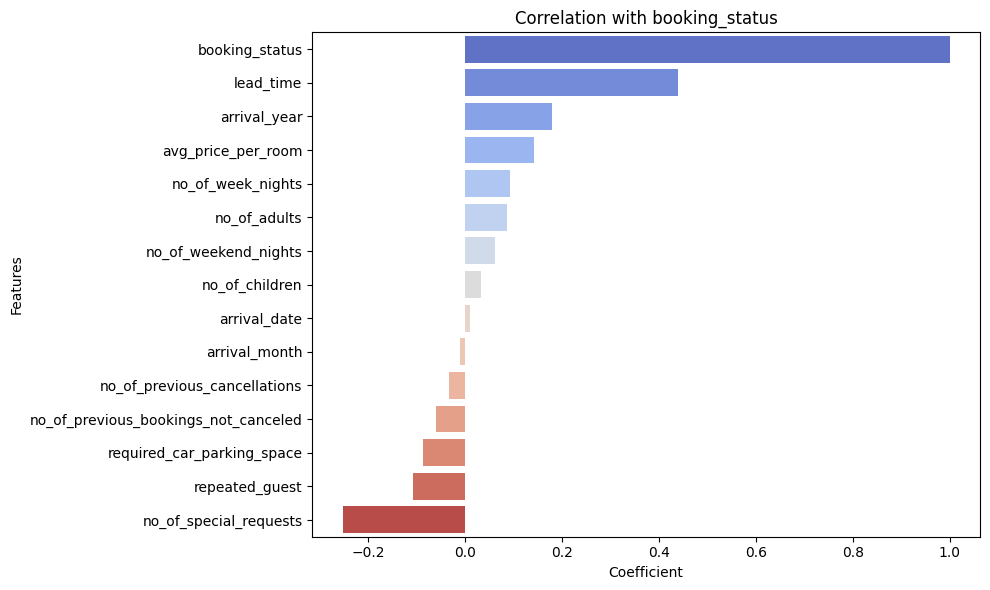

In [14]:
corr_matrix = df[num_cols].corr()
full_corr_with_target = corr_matrix['booking_status'].sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=full_corr_with_target.values, y=full_corr_with_target.index, palette="coolwarm")
plt.title("Correlation with booking_status")
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['booking_status']).columns

In [38]:
df['market_segment_type']

0        Offline
1         Online
2         Online
3         Online
4         Online
          ...   
36270     Online
36271     Online
36272     Online
36273     Online
36274    Offline
Name: market_segment_type, Length: 36275, dtype: object

In [16]:
def create_prep():
    num_transformer = Pipeline(steps=[('scaler', StandardScaler())]) #for ranging variables

    cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]) #for categorical variables one-hot encoding  

    prep = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                           ('cat', cat_transformer, cat_cols)]) #for combining numerical and categorical transformations
    return prep

preprocessor = create_prep() 

In [17]:
X = df.drop(columns='booking_status')  
Y = df['booking_status']                

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

# Model Building

XGBoost

In [19]:
pipe = imbPipeline(steps=[('prep', preprocessor),
                            ('smote', SMOTE(random_state=42)),
                            ('xg', XGBClassifier(random_state=42, use_label_encoder = False, eval_metric='logloss'))])
pipe.fit(Xtrain,Ytrain)
Ypred = pipe.predict(Xtest)
Yprob = pipe.predict_proba(Xtest)[:, 1]

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:31:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


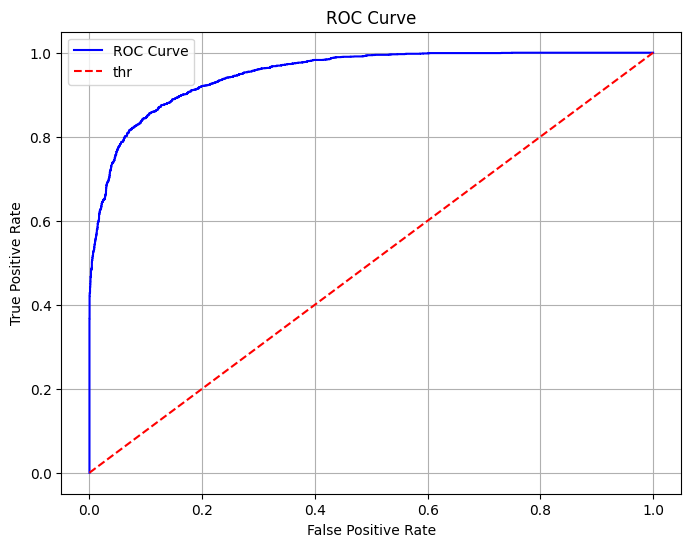

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Ytest, Yprob)  
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='thr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')    
plt.legend()
plt.grid()  
plt.show()

In [21]:
print("classification_report of XGBoost:")
print("classification_report")
print(classification_report(Ytest, Ypred))
print("ROC AUC = ", roc_auc_score(Ytest, Yprob))

classification_report of XGBoost:
classification_report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4878
           1       0.83      0.83      0.83      2377

    accuracy                           0.89      7255
   macro avg       0.87      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255

ROC AUC =  0.9510690636986302


<Figure size 600x400 with 0 Axes>

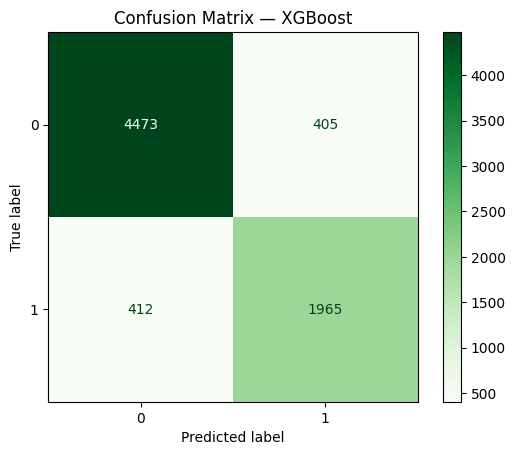

In [22]:
# Predictions
xgb_pred = pipe.predict(Xtest)

# Matrix
cm_xgb = confusion_matrix(Ytest, xgb_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=pipe.named_steps['xg'].classes_)

# Visualisation
plt.figure(figsize=(6, 4))
disp_xgb.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix — XGBoost")
plt.show()


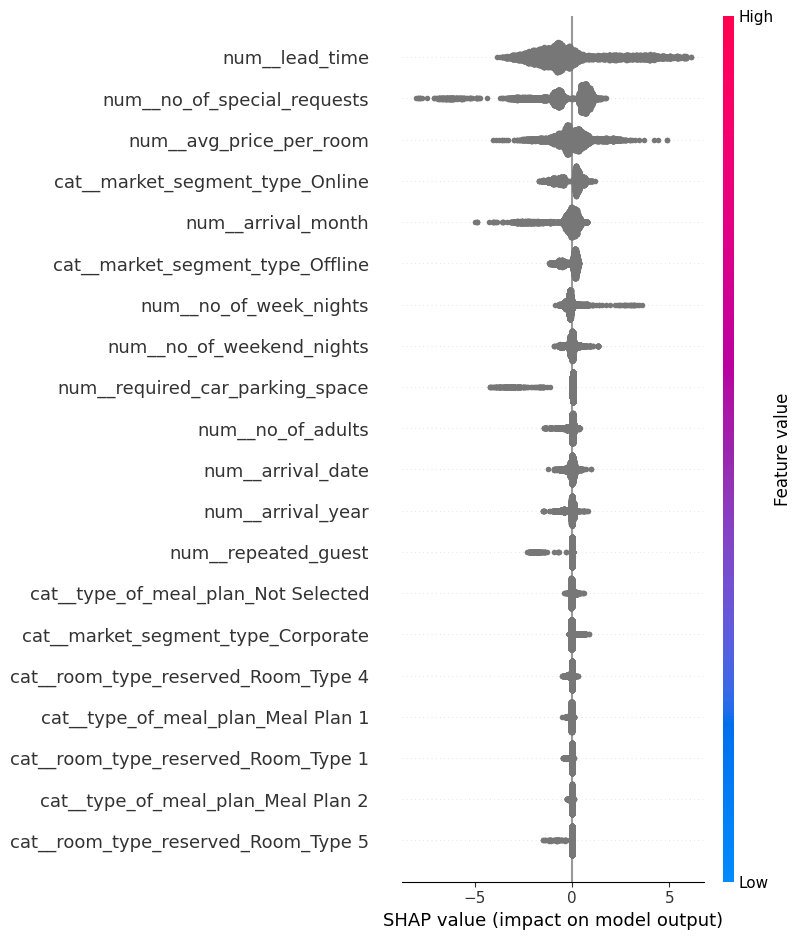

In [23]:
xgb_model = pipe.named_steps['xg']
xgb_prep = pipe.named_steps['prep']

# Трансформация тестовой выборки
X_transformed = xgb_prep.transform(Xtest)

# Получение имен признаков после трансформации
feature_names = xgb_prep.get_feature_names_out()

# SHAP-объяснение с использованием TreeExplainer (более устойчивый и быстрый для деревьев)
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_transformed)

# Построение цветного SHAP summary plot
shap.summary_plot(shap_values_xgb, features=X_transformed, feature_names=feature_names)

In [24]:
mean_shap = np.abs(shap_values_xgb).mean(axis=0)

# Связать с именами фичей
shap_df = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': mean_shap
})

# Получить топ-5
top5_shap = shap_df.sort_values(by='mean_abs_shap', ascending=False).head(5)
print("Топ-5 признаков по SHAP values:")
print(top5_shap)

Топ-5 признаков по SHAP values:
                               feature  mean_abs_shap
5                       num__lead_time       1.511658
13         num__no_of_special_requests       1.018226
12             num__avg_price_per_room       0.640171
29049  cat__market_segment_type_Online       0.493383
7                   num__arrival_month       0.401814


Проверка на переобучение

In [25]:
xgb_pipe = imbPipeline(steps=[
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])


xgb_pipe.fit(Xtrain, Ytrain)


Ytrain_pred = xgb_pipe.predict(Xtrain)
Ytest_pred = xgb_pipe.predict(Xtest)


print("Train Accuracy:", accuracy_score(Ytrain, Ytrain_pred))
print("Test Accuracy:", accuracy_score(Ytest, Ytest_pred))

print("\nTrain ROC AUC:", roc_auc_score(Ytrain, xgb_pipe.predict_proba(Xtrain)[:, 1]))
print("Test ROC AUC:", roc_auc_score(Ytest, xgb_pipe.predict_proba(Xtest)[:, 1]))

print("\nClassification Report (Test):\n", classification_report(Ytest, Ytest_pred))

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:32:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Accuracy: 0.8939696760854583
Test Accuracy: 0.8873880082701585

Train ROC AUC: 0.9582214721363662
Test ROC AUC: 0.9510690636986302

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      4878
           1       0.83      0.83      0.83      2377

    accuracy                           0.89      7255
   macro avg       0.87      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



# Model preparation for Deployment

### 1. Model rebuilding based on important features

In [26]:
X.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [27]:
mean_shap = np.abs(shap_values_xgb).mean(axis=0)

# Связать с именами фичей
shap_df = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': mean_shap
})

# Получить топ-5
top5_shap = shap_df.sort_values(by='mean_abs_shap', ascending=False).head(5)
print("Топ-5 признаков по SHAP values:")
print(top5_shap)

Топ-5 признаков по SHAP values:
                               feature  mean_abs_shap
5                       num__lead_time       1.511658
13         num__no_of_special_requests       1.018226
12             num__avg_price_per_room       0.640171
29049  cat__market_segment_type_Online       0.493383
7                   num__arrival_month       0.401814


In [28]:
Xshort = X[['lead_time', 'arrival_month','no_of_special_requests', 'avg_price_per_room', 'market_segment_type']]

In [29]:
XtrainS, XtestS, Ytrain, Ytest = train_test_split(Xshort, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [30]:
def create_prep():
    num_cols = ['lead_time', 'arrival_month', 'no_of_special_requests', 'avg_price_per_room']
    cat_cols = ['market_segment_type']

    num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    prep = ColumnTransformer(transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])
    
    return prep
preprocessor1 = create_prep() 

In [31]:
pipe = imbPipeline(steps=[('prep', preprocessor1),
                            ('smote', SMOTE(random_state=42)),
                            ('xg', XGBClassifier(random_state=42, use_label_encoder = False, eval_metric='logloss'))])
pipe.fit(XtrainS,Ytrain)
YpredS = pipe.predict(XtestS)
YprobS = pipe.predict_proba(XtestS)[:, 1]

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:32:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
print("classification_report of XGBoost with short features:")
print(classification_report(Ytest, YpredS))
print("ROC AUC = ", roc_auc_score(Ytest, YprobS))

classification_report of XGBoost with short features:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4878
           1       0.78      0.85      0.81      2377

    accuracy                           0.87      7255
   macro avg       0.85      0.87      0.86      7255
weighted avg       0.88      0.87      0.87      7255

ROC AUC =  0.9430899388926578


In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'xg__n_estimators': [100, 200],
    'xg__max_depth': [3, 5, 7],
    'xg__learning_rate': [0.05, 0.1],
    'xg__subsample': [0.7, 1.0],
    'xg__colsample_bytree': [0.7, 1.0]
}

# Grid Search
grid_search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Обучение
grid_search.fit(XtrainS, Ytrain)

# Результаты
print("Best parameters found: ", grid_search.best_params_)



Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:  {'xg__colsample_bytree': 1.0, 'xg__learning_rate': 0.1, 'xg__max_depth': 7, 'xg__n_estimators': 200, 'xg__subsample': 0.7}


In [34]:
pipe = imbPipeline(steps=[('prep', preprocessor1),
                            ('smote', SMOTE(random_state=42)),
                            ('xg', XGBClassifier(random_state=42, use_label_encoder = False, eval_metric='logloss', colsample_bytree=1.0, max_depth=7, n_estimators=200, learning_rate=0.1, subsample=0.7))])
pipe.fit(XtrainS,Ytrain)
YpredS = pipe.predict(XtestS)
YprobS = pipe.predict_proba(XtestS)[:, 1]

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:33:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [35]:
print("classification_report of XGBoost with short features and with tuning:")
print(classification_report(Ytest, YpredS))
print("ROC AUC = ", roc_auc_score(Ytest, YprobS))

classification_report of XGBoost with short features and with tuning:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4878
           1       0.78      0.85      0.81      2377

    accuracy                           0.87      7255
   macro avg       0.85      0.87      0.86      7255
weighted avg       0.88      0.87      0.87      7255

ROC AUC =  0.9449816584829709


### Exporting

In [39]:
from joblib import dump
dump(pipe, "model5_features.joblib")  


['model5_features.joblib']